# Preparation

In [1]:
# !pip install pandas
# !pip install matplotlib

# Import libraries
import pandas as pd

from Utils import *

### Global Parameters

In [2]:
# Specify the data path
datafile = '../data/static-multimap-data.csv'

output_keys = ['Benchmark', 'Label', 'Distribution', 'CGSize', 'NumReps', 'NumInputs', \
               'Occupancy', 'GPU Time (sec)', 'Elem/s (elem/sec)', 'Bandwidth (GB/s)']

### Import Data

In [3]:
# Read csv file
rawdf = pd.read_csv(datafile)

# Filter out skipped tests
perfdf = rawdf[rawdf["Key"] == rawdf["Value"]].reset_index(drop=True)

# Set 'Int64' as CG Size type. Default is 'float64'.
perfdf['CGSize'] = perfdf['CGSize'].astype('Int64')

# Add labels
perfdf['Label'] = perfdf["Key"] + "_" + perfdf["Distribution"]
perfdf.loc[perfdf['CGSize'].notnull(), 'Label'] += "_" + perfdf['CGSize'].astype(str)

perfdf["Bandwidth (GB/s)"] = perfdf["GlobalMem BW (bytes/sec)"] / (1000 * 1000 * 1000)

# Trim data frame for visualization
perfdf = perfdf[output_keys]

# Visualization

### Visualization Parameters

In [4]:
# Get benchmark list
unique_bms = perfdf["Benchmark"].unique()
for it in unique_bms:
    print(it)

nvbench_static_multimap_insert
nvbench_static_multimap_count
nvbench_static_multimap_find_all
nvbench_static_multimap_retrieve
nvbench_static_multimap_insert_cgsize


### insert 

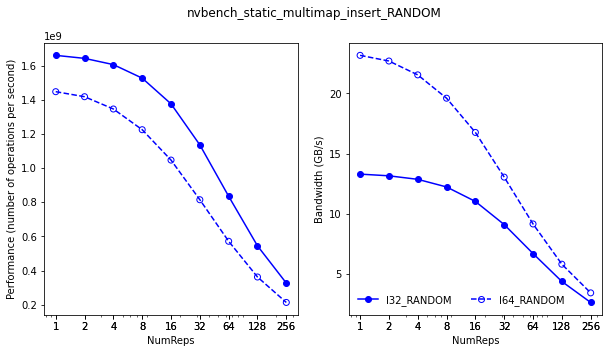

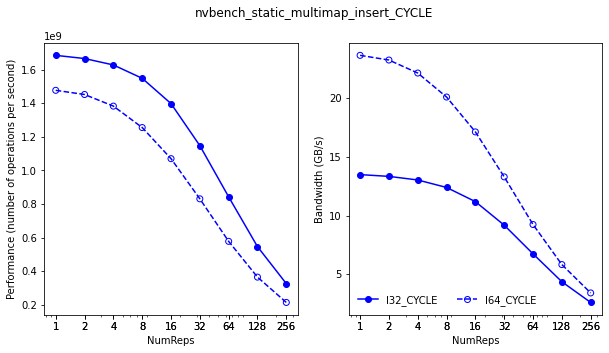

In [5]:
for bm in unique_bms:
    flag = "nvbench_static_multimap_insert" == bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        randomdf = tmpdf[tmpdf["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_RANDOM", randomdf, "NumReps", unique_labels, flag)
        
        cycledf = tmpdf[tmpdf["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_CYCLE", cycledf, "NumReps", unique_labels, flag)

### count

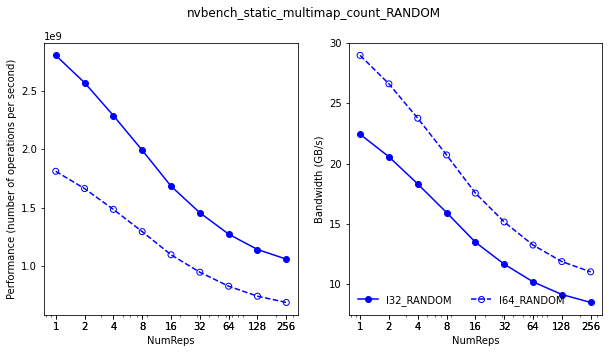

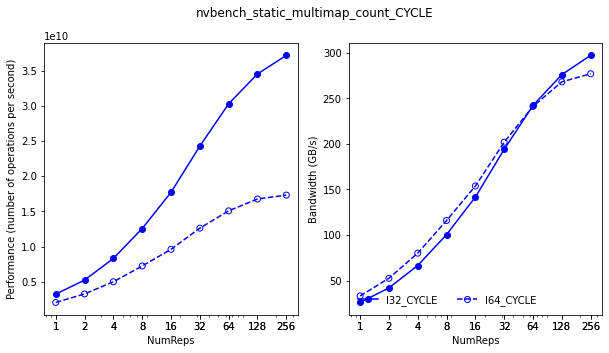

In [6]:
for bm in unique_bms:
    flag = "count" in bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        randomdf = tmpdf[tmpdf["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_RANDOM", randomdf, "NumReps", unique_labels, flag)
        
        cycledf = tmpdf[tmpdf["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_CYCLE", cycledf, "NumReps", unique_labels, flag)

### insert by varying CG sizes

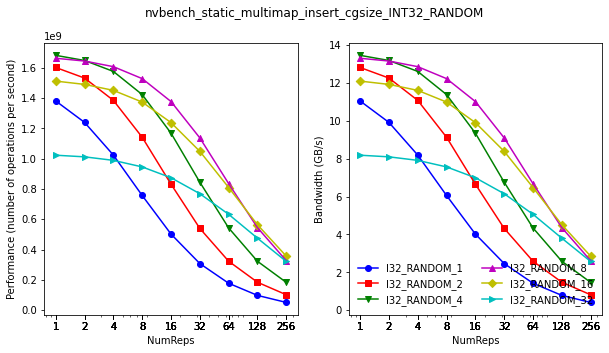

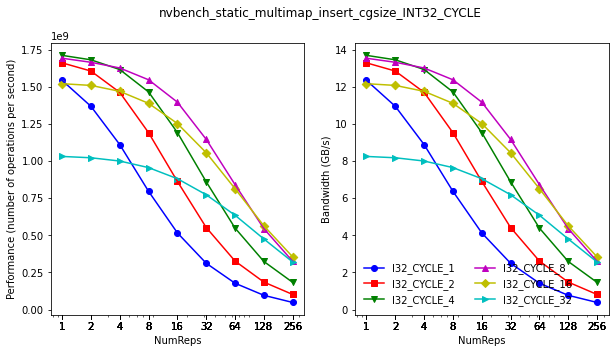

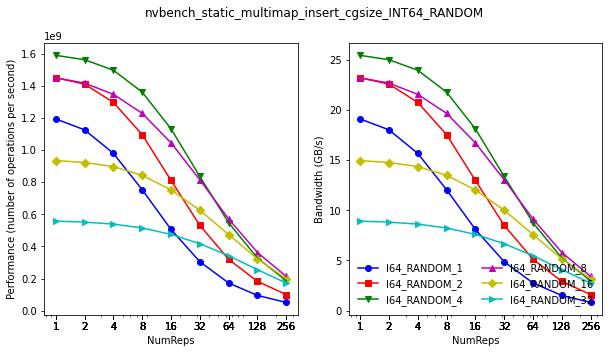

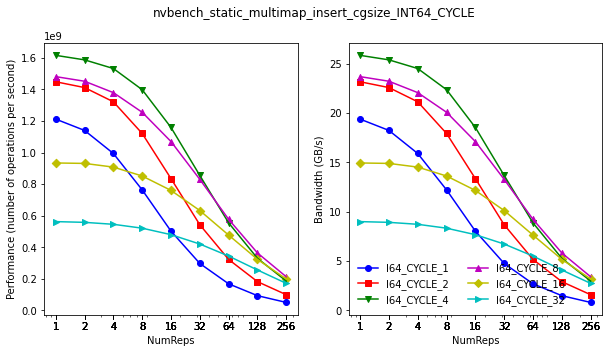

In [7]:
for bm in unique_bms:
    flag = "insert_cgsize" in bm
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        # Plot INT32 performance
        tmp_int32df = tmpdf[tmpdf["Label"].str.contains('I32')]
        
        randomdf = tmp_int32df[tmp_int32df["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_INT32_RANDOM", randomdf, "NumReps", unique_labels, flag, True)
        
        cycledf = tmp_int32df[tmp_int32df["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_INT32_CYCLE", cycledf, "NumReps", unique_labels, flag, True)

        
        # Plot INT64 Performance
        tmp_int64df = tmpdf[tmpdf["Label"].str.contains('I64')]
        
        randomdf = tmp_int64df[tmp_int64df["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_INT64_RANDOM", randomdf, "NumReps", unique_labels, flag, True)
        
        cycledf = tmp_int64df[tmp_int64df["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_INT64_CYCLE", cycledf, "NumReps", unique_labels, flag, True)

### find_all

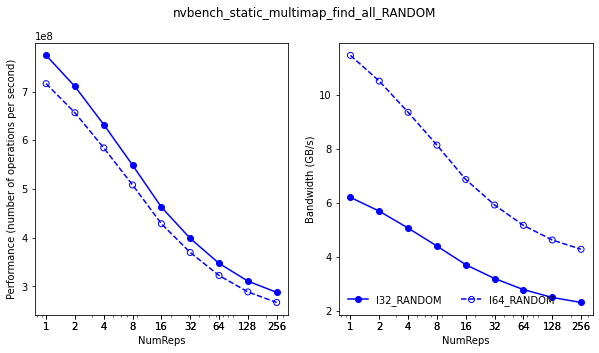

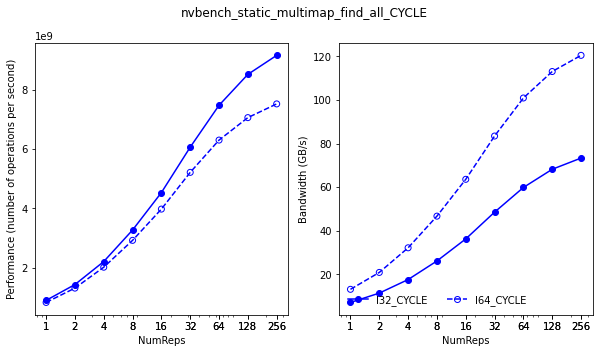

In [8]:
for bm in unique_bms:
    flag = "find_all" in bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        randomdf = tmpdf[tmpdf["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_RANDOM", randomdf, "NumReps", unique_labels, flag)
        
        cycledf = tmpdf[tmpdf["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_CYCLE", cycledf, "NumReps", unique_labels, flag)

### retrieve

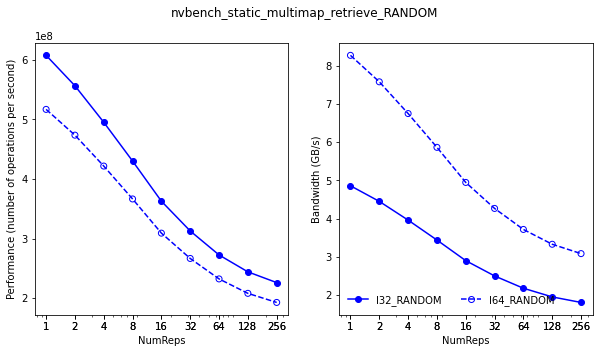

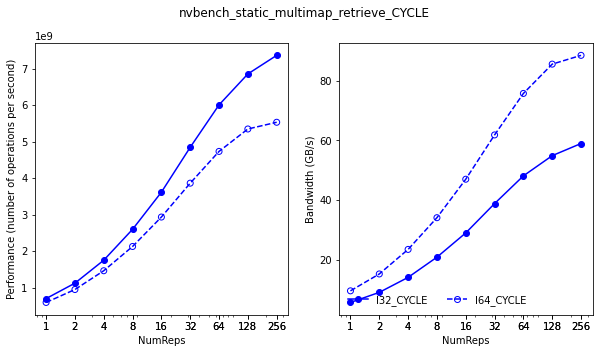

In [9]:
for bm in unique_bms:
    flag = "retrieve" in bm
    
    if flag:
        tmpdf = perfdf[perfdf["Benchmark"] == bm]
        
        randomdf = tmpdf[tmpdf["Distribution"] == "RANDOM"].reset_index(drop=True)
        unique_labels = randomdf["Label"].unique()
        plot_perf(bm + "_RANDOM", randomdf, "NumReps", unique_labels, flag)
        
        cycledf = tmpdf[tmpdf["Distribution"] == "CYCLE"].reset_index(drop=True)
        unique_labels = cycledf["Label"].unique()
        plot_perf(bm + "_CYCLE", cycledf, "NumReps", unique_labels, flag)